In [ ]:
#LOADING THE DATASET
with open('kmeans_data.txt', 'r') as file:
    data = file.read()

In [ ]:
import math
# SPLIT THE DATA SET IN LIST OF LIST FORM
temp = data.split( )
data_set=[]
for i in range (0,len(temp),2):
  temp1 = []
  temp1.append(float(temp[i]))
  temp1.append(float(temp[i+1]))
  data_set.append(temp1)
print(data_set)

[[-0.65224338, -0.75800961], [3.8584055, 2.0623607], [-1.6328513, 5.3827894], [-4.7685935, 0.46966546], [-5.3827894, 1.6328513], [0.94597537, -1.2067484], [-1.2425256, 0.24611891], [-0.50284751, -1.4485356], [1.1355621, -0.56119791], [-4.5612633, 0.44924523], [-4.3859765, -1.3304714], [-2.0623607, 3.8584055], [1.0567392, -5.3125869], [4.5833333, 0.0], [4.3859765, -1.3304714], [-2.4551913, 4.5933399], [0.37495063, -0.92704478], [4.18714, 3.436297], [-4.3305709, 2.893595], [-1.2555724, -0.16727929], [-0.95014691, 0.31180259], [-1.4557681, -0.48150836], [-0.5960445, -1.1176652], [4.6193977, -1.9134172], [0.86025759, 0.50985966], [-3.3819207, 2.7754706], [-4.186614, 1.2699955], [0.82468216, -0.96142799], [1.2521396, -0.19128763], [-0.78488541, 0.61964094], [-1.2095195, -3.9872514], [-0.53092618, -5.3905839], [1.0729879, -1.0953575], [2.6621074, -3.9841252], [-0.73014469, -1.0350523], [-3.8584055, 2.0623607], [-0.70050772, 0.71364483], [0.19036808, -1.52147], [-0.93991538, -0.84911926], [-0

In [ ]:
import numpy as np
# RBF KERNEL ON [X1,X2] AND [X1',X2']
def kernel_function(a,b):
  dist = ((np.linalg.norm(a[0]-b[0])**2+np.linalg.norm(a[1]-b[1])**2))*-0.1
  return math.exp(dist)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

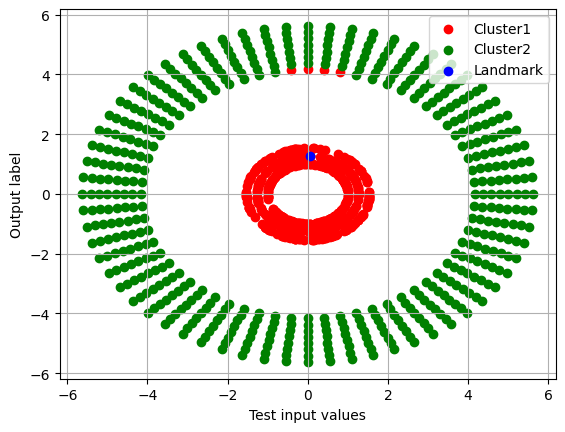

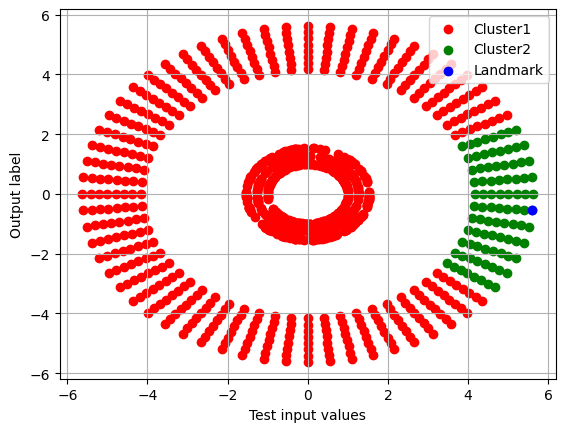

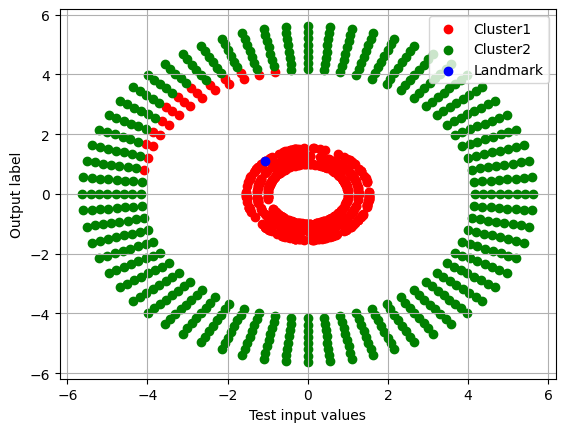

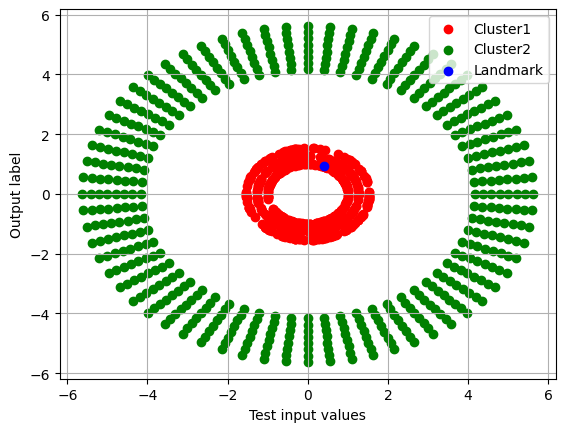

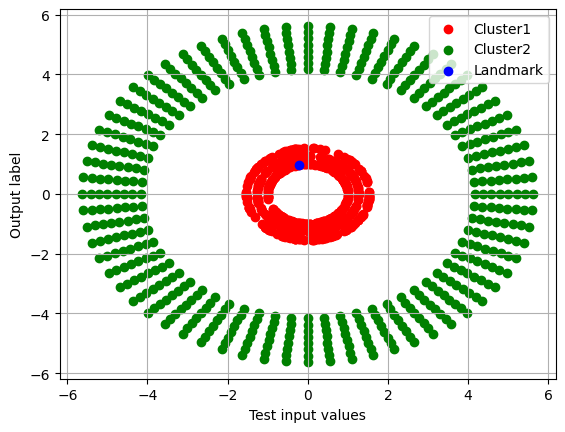

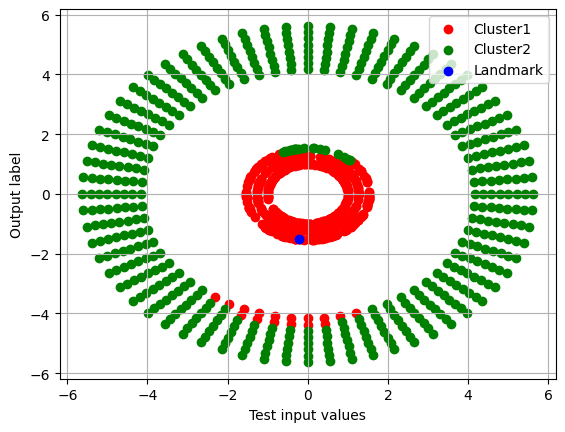

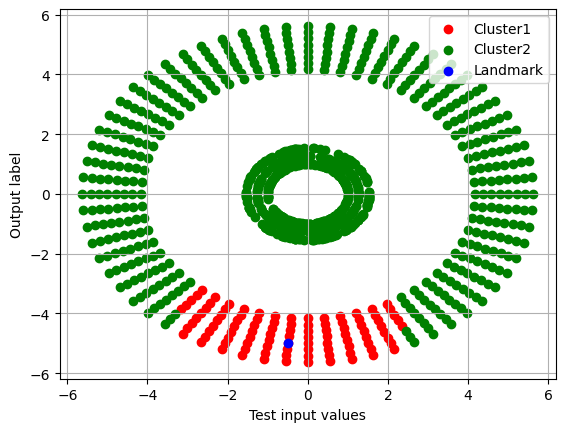

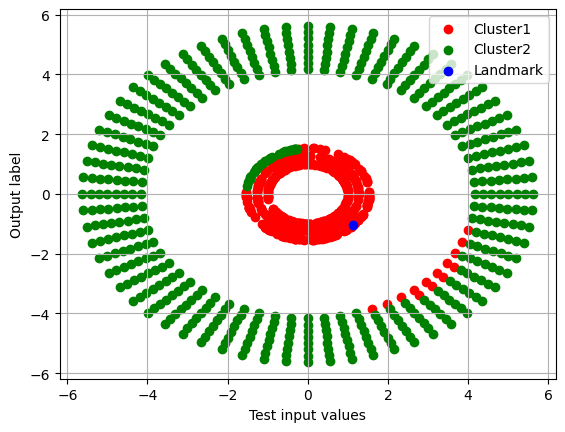

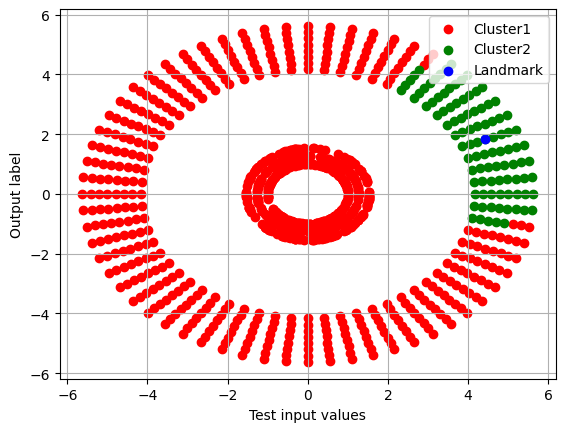

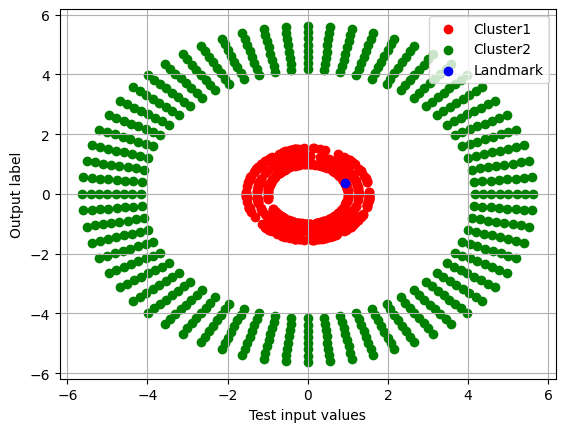

In [ ]:
for i in range (0,10):
  # CHOOSE A LANDMARK
  index = random.randint(0, len(data_set)-1)
  new_set = []
  # APPLY KERNEL BETWEEN EVERY DATAPOINT AND LANDMARK
  for i in range (0,len(data_set)):
    new_set.append(kernel_function(data_set[index],data_set[i]))

  # ASSIGN FIRST TWO DATA AS INITIAL CLUSTER MEAN
  mean1 = new_set[0]
  mean2 = new_set[1]
  cluster_id = []
  for j in range(0,10):
    temp = []
    # COMPUTE DISTANCE OF DATA FROM CLUSTER MEANS
    for i in range (0,len(new_set)):
      dist1 = np.linalg.norm(mean1-new_set[i])
      dist2 = np.linalg.norm(mean2-new_set[i])

      # ASSIGN DATA TO CLOSER CLUSTER
      if dist1 < dist2:
        temp.append(1)
      else:
        temp.append(2)

    # CALCULATE NEW MEANS
    c1 = 0
    c2 = 0
    sum1_1 = 0
    sum2_1 = 0
    for i in range (len(temp)):
      if(temp[i]==1):
        c1+=1
        sum1_1 += new_set[i]
      else:
        c2+=1
        sum2_1 += new_set[i]
    mean1=sum1_1/c1
    mean2=sum2_1/c2
    cluster_id = temp

  # PLOT THA SCATTER GRAPH
  x1 = []
  y1 = []
  x2 = []
  y2 = []
  for i in range (len(cluster_id)):
    if(cluster_id[i] == 1):
      x1.append(data_set[i][0])
      y1.append(data_set[i][1])
    else:
      x2.append(data_set[i][0])
      y2.append(data_set[i][1])
  plt.scatter(x1, y1, color='r', label='Cluster1')
  plt.scatter(x2, y2, color='g', label='Cluster2')
  plt.scatter(data_set[index][0], data_set[index][1], color='b', label='Landmark')
  plt.xlabel('Test input values')
  plt.ylabel('Output label')
  plt.legend()
  plt.grid()
  plt.show()